In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Desktop/results_cluster/voxelstrace_case_1_0_0_keep_Jul_21_2020_00:31:34.csv'
memory_filepath = '/home/user/Desktop/results_cluster/memorytrace_case_1_0_0_keep_Jul_21_2020_00:31:34.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,2679687500
1,2679687500
2,2679687500
3,2679687500
4,2679687500


In [4]:
print(len(vox_data.index))

33


In [5]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,5359.375
1,5359.375
2,5359.375
3,5359.375
4,5359.375
5,5359.375
6,5359.375
7,5359.375
8,5359.375
9,5359.375


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,2528.746094,28.964844
1,4104.171875,28.964844
2,6147.429688,28.964844
3,6665.402344,28.964844
4,6670.011719,28.964844


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,2529.0,29.0
1,4104.0,29.0
2,6147.0,29.0
3,6665.0,29.0
4,6670.0,29.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,29.0
1,1575.0,29.0
2,3618.0,29.0
3,4136.0,29.0
4,4141.0,29.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

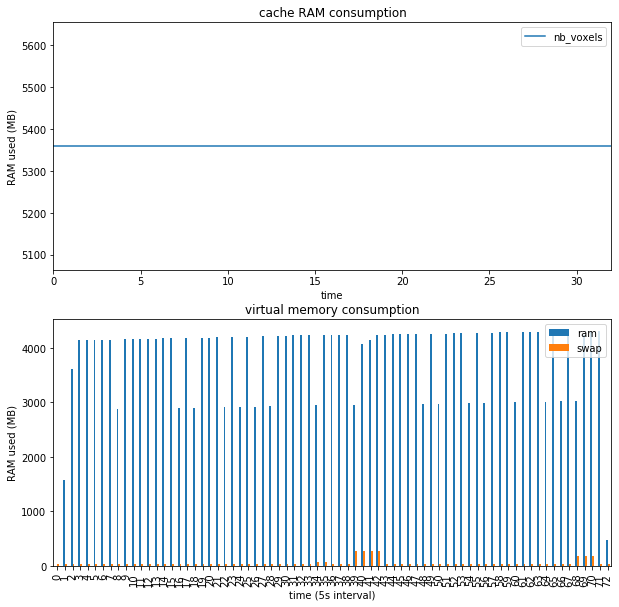

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')